In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from read_csv_file import read_csv_file
file_path = '/Users/remiliascarlet/Desktop/MDP/transfer_learning/burst_data/csv/240330182002-PeachMountian.csv'


In [2]:
df = read_csv_file(file_path)
# if df is not None:
#     print("DataFrame head:\n", df)

dates = df['Date']
times = df['Time']
frequency = df.columns[2:].astype(int)
data = df.iloc[:, 2:]

# print("Dates:\n", dates.head())
# print("Times:\n", times.head())
# print("Frequency (Hz):\n", frequency)
# print("Data:\n", data.head())

High variance columns: [   4    5    6 ... 8618 8619 8620]
Low variance rows: [  0   1 135 140 148 289 291 305 306 307 308 309 310 311 312 313 314 315
 316 317 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334
 335 336 337 338 339 340 341 342 344 345 346 347 348 349 350 351 352 353
 354 355 356 357 358 359 360 361 362 363 364 365 396 398 399 410]


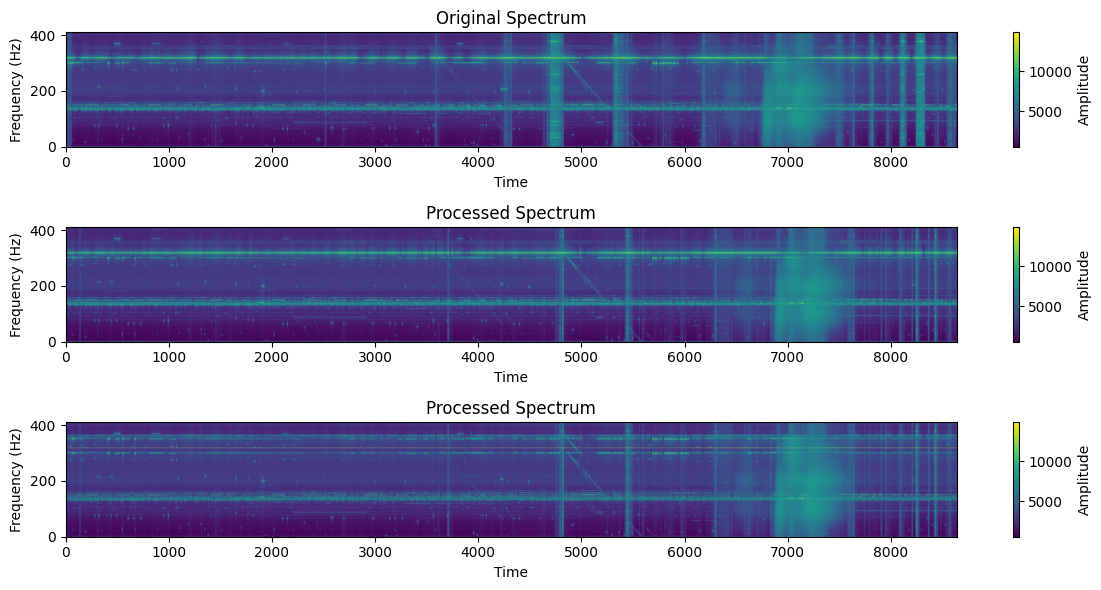

In [3]:
from data_denoise import remove_horizontal_noise, remove_vertical_noise

remove_horizontal_data = remove_horizontal_noise(data)
removed_data = remove_vertical_noise(remove_horizontal_data)

plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.imshow(data.T, aspect='auto', origin='lower', cmap='viridis')
plt.title('Original Spectrum')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Amplitude')

plt.subplot(3, 1, 2)
plt.imshow(remove_horizontal_data.T, aspect='auto', origin='lower', cmap='viridis')
plt.title('Processed Spectrum')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Amplitude')

plt.subplot(3, 1, 3)
plt.imshow(removed_data.T, aspect='auto', origin='lower', cmap='viridis')
plt.title('Processed Spectrum')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Amplitude')

plt.tight_layout()
plt.show()

start_index: 6751 end_index: 7582


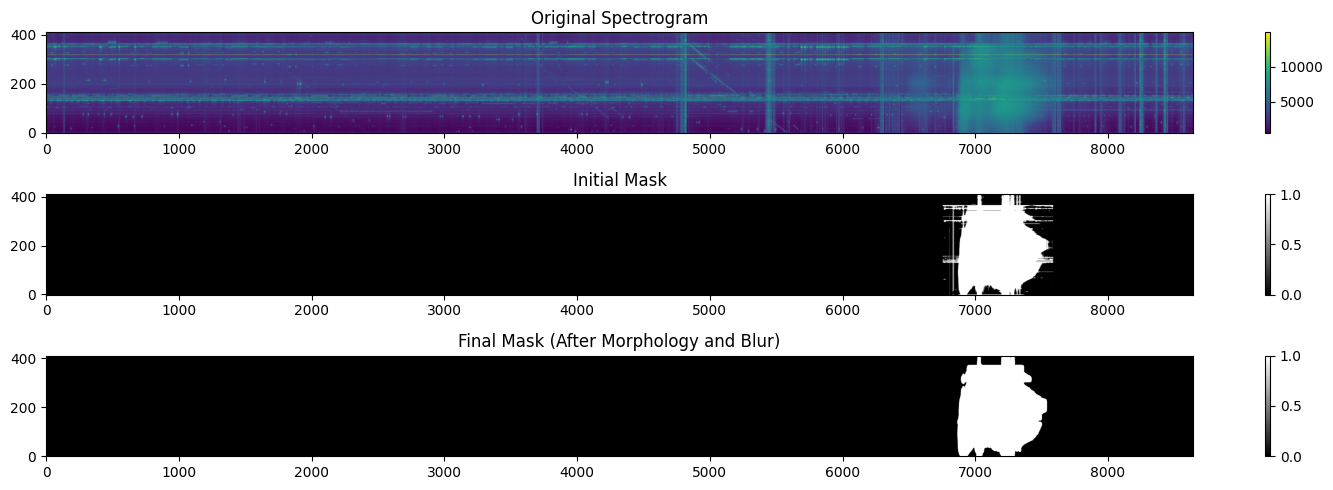

In [4]:
from data_label import time_to_column_indices, create_srb_mask, apply_morphological_operations, blur

start_time_str = '18:31:17' # Replace with the actual onset time of your data
end_time_str = '18:32:40' # Replace with the actual offset time of your data

start_index, end_index = time_to_column_indices(times, start_time_str, end_time_str)
print("start_index:", start_index, "end_index:", end_index)

initial_mask = create_srb_mask(removed_data, start_index, end_index)
morph_mask = apply_morphological_operations(initial_mask, erosion_radius=5, dilation_radius=10, operation_sequence=['erode', 'dilate'])
# final_mask = blur(morph_mask, blur_filter_shape=(5, 5))

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(3, 1, 1)
plt.imshow(removed_data.T, aspect='auto', cmap='viridis', origin='lower')
plt.title('Original Spectrogram')
plt.colorbar()

plt.subplot(3, 1, 2)
plt.imshow(initial_mask.T, aspect='auto', cmap='gray', origin='lower')
plt.title('Initial Mask')
plt.colorbar()

plt.subplot(3, 1, 3)
plt.imshow(morph_mask.T, aspect='auto', cmap='gray', origin='lower')
plt.title('Final Mask (After Morphology and Blur)')
plt.colorbar()

plt.tight_layout()
plt.show()

In [5]:
# from data_denoise import remove_vertical_noise
from data_label import detect_srb

# cleaned_mask = detect_srb(removed_data)

# plt.subplot(3, 1, 3)
# plt.plot(cleaned_mask, label='Processed Mask', color='orange')
# plt.title('Processed Mask')
# plt.xlabel('Time')
# plt.ylabel('Mask')
# plt.legend()

